### Preparation

In [ ]:
!pip install datasets
!pip install transformers
!pip install transformers[torch]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from transformers import AutoModelForSequenceClassification
from transformers import Trainer
from datasets import load_metric

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [ ]:
df1 = 'https://raw.githubusercontent.com/Zaniiiii/DataGemas/main/Baru/cleaning_result%20v1.csv'
df = pd.read_csv(df1, sep=",")

df.rename(columns={"text_clean": "text", "class": "label"}, inplace=True)
df.replace("", float("NaN"), inplace=True)
df.dropna(inplace=True)

df = df[['text', 'label']]
df.sample(5)

,text,label
410,jakarta fasilitas transportasi umum agam jakli...,1
199,sayang jaklingko indomaret selasa lumayan jauh...,2
82,jaklingko memang,0
1124,edisi jakarta memang pakai logo jaklingko kaka...,0
1038,lihat konten mbak jali tiktok soal transportas...,0


## Preprocess

In [ ]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import shutil
import sys
import re

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-fb0e5fa3-eb5c-06a0-b9a5-b3e807554189)


In [ ]:
#import data
df = pd.read_csv('https://raw.githubusercontent.com/Zaniiiii/Data/main/aic/project1/sinta/sinta1.csv', sep=',')
df

,web-scraper-order,web-scraper-start-url,link,link-href,prev,Judul,Penulis,Abstrak,Sdgs
0,1698367984-1,https://sinta.kemdikbud.go.id/affiliations/pro...,A Bandwidth Enhanced Circular Ring Microstrip ...,https://www.scopus.com/record/display.uri?eid=...,https://sinta.kemdikbud.go.id/affiliations/pro...,A Bandwidth Enhanced Circular Ring Microstrip ...,"[{""Penulis"":""Ryanu, Harfan Hian""},{""Penulis"":""...",The development of 5G technology requires ante...,AbstractThe development of 5G technology requi...
1,1698367987-2,https://sinta.kemdikbud.go.id/affiliations/pro...,Analysis of The Effect of Impulsive Purchase a...,https://www.scopus.com/record/display.uri?eid=...,https://sinta.kemdikbud.go.id/affiliations/pro...,Analysis of The Effect of Impulsive Purchase a...,"[{""Penulis"":""Suyanto, Ama""},{""Penulis"":""Femi, ...",In order to provide satisfactory service quali...,AbstractIn order to provide satisfactory servi...
2,1698367990-3,https://sinta.kemdikbud.go.id/affiliations/pro...,PPG Signals-Based Blood-Pressure Estimation Us...,https://www.scopus.com/record/display.uri?eid=...,https://sinta.kemdikbud.go.id/affiliations/pro...,PPG Signals-Based Blood-Pressure Estimation Us...,"[{""Penulis"":""Mahardika T, Nurul Qashri""},{""Pen...",Researchers commonly use continuous noninvasiv...,AbstractResearchers commonly use continuous no...
3,1698367993-4,https://sinta.kemdikbud.go.id/affiliations/pro...,A Study on Behaviour Intention towards Adoptio...,https://www.scopus.com/record/display.uri?eid=...,https://sinta.kemdikbud.go.id/affiliations/pro...,A Study on Behaviour Intention towards Adoptio...,"[{""Penulis"":""Castanha, Jick""},{""Penulis"":""Gura...",The purpose of the study is to examine travell...,AbstractThe purpose of the study is to examine...
4,1698367996-5,https://sinta.kemdikbud.go.id/affiliations/pro...,Performance Analysis of Virtual Learning Syste...,https://www.scopus.com/record/display.uri?eid=...,https://sinta.kemdikbud.go.id/affiliations/pro...,Performance Analysis of Virtual Learning Syste...,"[{""Penulis"":""Arisandi, Stevan Del""},{""Penulis""...",Virtual e-learning system is a learning activi...,AbstractVirtual e-learning system is a learnin...
...,...,...,...,...,...,...,...,...,...
2836,1698377658-2837,https://sinta.kemdikbud.go.id/affiliations/pro...,Potential detection application of nodular mel...,https://www.scopus.com/record/display.uri?eid=...,NaN,Potential detection application of nodular mel...,"[{""Penulis"":""Alhakim, Muhammad""},{""Penulis"":""P...",Nodular melanoma is a deadly rare type of skin...,AbstractNodular melanoma is a deadly rare type...
2837,1698377661-2838,https://sinta.kemdikbud.go.id/affiliations/pro...,Measuring information dissemination mechanism ...,https://www.scopus.com/record/display.uri?eid=...,NaN,Measuring information dissemination mechanism ...,"[{""Penulis"":""Alamsyah, Andry""},{""Penulis"":""Riz...",Social media has changed human social interact...,AbstractSocial media has changed human social ...
2838,1698377664-2839,https://sinta.kemdikbud.go.id/affiliations/pro...,Forecasting portfolio optimization using artif...,https://www.scopus.com/record/display.uri?eid=...,NaN,Forecasting portfolio optimization using artif...,"[{""Penulis"":""Solin, Mohammad Maholi""},{""Penuli...",Investment has an important role in the econom...,AbstractInvestment has an important role in th...
2839,1698377667-2840,https://sinta.kemdikbud.go.id/affiliations/pro...,Comparison of Classical Interpolation Methods ...,https://www.scopus.com/record/display.uri?eid=...,NaN,Comparison of Classical Interpolation Methods ...,"[{""Penulis"":""Usman, Koredianto""},{""Penulis"":""R...",The emerging of a new compression technique ca...,AbstractThe emerging of a new compression tech...


In [ ]:
df = df.drop(['web-scraper-order','web-scraper-start-url','link','link-href','prev'],axis = 1)
df

,Judul,Penulis,Abstrak,Sdgs
0,A Bandwidth Enhanced Circular Ring Microstrip ...,"[{""Penulis"":""Ryanu, Harfan Hian""},{""Penulis"":""...",The development of 5G technology requires ante...,AbstractThe development of 5G technology requi...
1,Analysis of The Effect of Impulsive Purchase a...,"[{""Penulis"":""Suyanto, Ama""},{""Penulis"":""Femi, ...",In order to provide satisfactory service quali...,AbstractIn order to provide satisfactory servi...
2,PPG Signals-Based Blood-Pressure Estimation Us...,"[{""Penulis"":""Mahardika T, Nurul Qashri""},{""Pen...",Researchers commonly use continuous noninvasiv...,AbstractResearchers commonly use continuous no...
3,A Study on Behaviour Intention towards Adoptio...,"[{""Penulis"":""Castanha, Jick""},{""Penulis"":""Gura...",The purpose of the study is to examine travell...,AbstractThe purpose of the study is to examine...
4,Performance Analysis of Virtual Learning Syste...,"[{""Penulis"":""Arisandi, Stevan Del""},{""Penulis""...",Virtual e-learning system is a learning activi...,AbstractVirtual e-learning system is a learnin...
...,...,...,...,...
2836,Potential detection application of nodular mel...,"[{""Penulis"":""Alhakim, Muhammad""},{""Penulis"":""P...",Nodular melanoma is a deadly rare type of skin...,AbstractNodular melanoma is a deadly rare type...
2837,Measuring information dissemination mechanism ...,"[{""Penulis"":""Alamsyah, Andry""},{""Penulis"":""Riz...",Social media has changed human social interact...,AbstractSocial media has changed human social ...
2838,Forecasting portfolio optimization using artif...,"[{""Penulis"":""Solin, Mohammad Maholi""},{""Penuli...",Investment has an important role in the econom...,AbstractInvestment has an important role in th...
2839,Comparison of Classical Interpolation Methods ...,"[{""Penulis"":""Usman, Koredianto""},{""Penulis"":""R...",The emerging of a new compression technique ca...,AbstractThe emerging of a new compression tech...


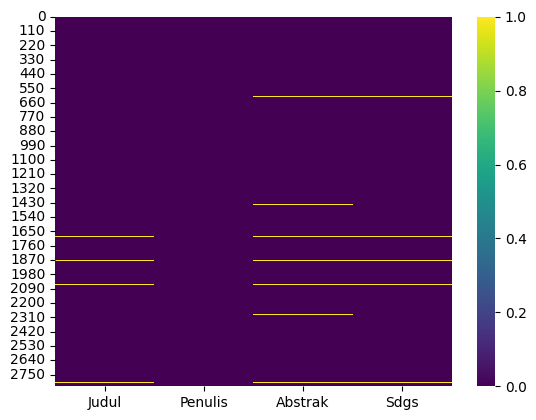

In [ ]:
# Membuat heatmap NaN
import seaborn as sns

sns.heatmap(df.isnull(), cmap='viridis')
plt.show()

In [ ]:
df = df.dropna()

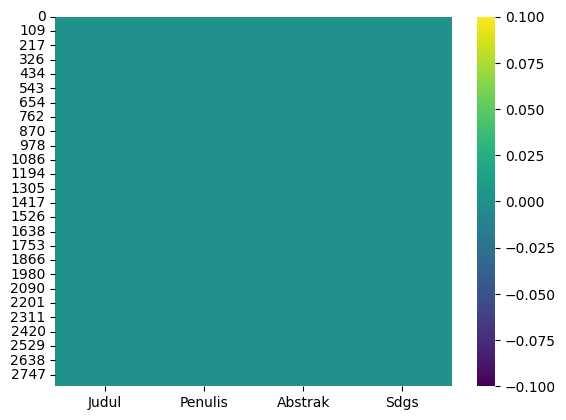

In [ ]:
# Membuat heatmap NaN
import seaborn as sns

sns.heatmap(df.isnull(), cmap='viridis')
plt.show()

In [ ]:
# df['sdgsOneHot'] = np.nan
# df

In [ ]:
aspects = {
  'SDG1' : ['Goal 1'],
  'SDG2' : ['Goal 2'],
  'SDG3' : ['Goal 3'],
  'SDG4' : ['Goal 4'],
  'SDG5' : ['Goal 5'],
  'SDG6' : ['Goal 6'],
  'SDG7' : ['Goal 7'],
  'SDG8' : ['Goal 8'],
  'SDG9' : ['Goal 9'],
  'SDG10' : ['Goal 10'],
  'SDG11' : ['Goal 11'],
  'SDG12' : ['Goal 12'],
  'SDG13' : ['Goal 13'],
  'SDG14' : ['Goal 14'],
  'SDG15' : ['Goal 15'],
  'SDG16' : ['Goal 16'],
  'SDG17' : ['Goal 17']
}

In [ ]:
df

,Judul,Penulis,Abstrak,Sdgs
0,A Bandwidth Enhanced Circular Ring Microstrip ...,"[{""Penulis"":""Ryanu, Harfan Hian""},{""Penulis"":""...",The development of 5G technology requires ante...,AbstractThe development of 5G technology requi...
1,Analysis of The Effect of Impulsive Purchase a...,"[{""Penulis"":""Suyanto, Ama""},{""Penulis"":""Femi, ...",In order to provide satisfactory service quali...,AbstractIn order to provide satisfactory servi...
2,PPG Signals-Based Blood-Pressure Estimation Us...,"[{""Penulis"":""Mahardika T, Nurul Qashri""},{""Pen...",Researchers commonly use continuous noninvasiv...,AbstractResearchers commonly use continuous no...
3,A Study on Behaviour Intention towards Adoptio...,"[{""Penulis"":""Castanha, Jick""},{""Penulis"":""Gura...",The purpose of the study is to examine travell...,AbstractThe purpose of the study is to examine...
4,Performance Analysis of Virtual Learning Syste...,"[{""Penulis"":""Arisandi, Stevan Del""},{""Penulis""...",Virtual e-learning system is a learning activi...,AbstractVirtual e-learning system is a learnin...
...,...,...,...,...
2836,Potential detection application of nodular mel...,"[{""Penulis"":""Alhakim, Muhammad""},{""Penulis"":""P...",Nodular melanoma is a deadly rare type of skin...,AbstractNodular melanoma is a deadly rare type...
2837,Measuring information dissemination mechanism ...,"[{""Penulis"":""Alamsyah, Andry""},{""Penulis"":""Riz...",Social media has changed human social interact...,AbstractSocial media has changed human social ...
2838,Forecasting portfolio optimization using artif...,"[{""Penulis"":""Solin, Mohammad Maholi""},{""Penuli...",Investment has an important role in the econom...,AbstractInvestment has an important role in th...
2839,Comparison of Classical Interpolation Methods ...,"[{""Penulis"":""Usman, Koredianto""},{""Penulis"":""R...",The emerging of a new compression technique ca...,AbstractThe emerging of a new compression tech...


In [ ]:
def get_aspects(review):
  review = str(review)
  review_aspects = []

  for aspect, keywords in aspects.items():
    for keyword in keywords:
      if re.search(fr'{re.escape(keyword)}', review):
        review_aspects.append(aspect)
        break
  return review_aspects

df['aspects'] = df['Sdgs'].apply(get_aspects)

<ipython-input-190-53d539102c9c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['aspects'] = df['Sdgs'].apply(get_aspects)


In [ ]:
df

,Judul,Penulis,Abstrak,Sdgs,aspects
0,A Bandwidth Enhanced Circular Ring Microstrip ...,"[{""Penulis"":""Ryanu, Harfan Hian""},{""Penulis"":""...",The development of 5G technology requires ante...,AbstractThe development of 5G technology requi...,[]
1,Analysis of The Effect of Impulsive Purchase a...,"[{""Penulis"":""Suyanto, Ama""},{""Penulis"":""Femi, ...",In order to provide satisfactory service quali...,AbstractIn order to provide satisfactory servi...,[]
2,PPG Signals-Based Blood-Pressure Estimation Us...,"[{""Penulis"":""Mahardika T, Nurul Qashri""},{""Pen...",Researchers commonly use continuous noninvasiv...,AbstractResearchers commonly use continuous no...,[]
3,A Study on Behaviour Intention towards Adoptio...,"[{""Penulis"":""Castanha, Jick""},{""Penulis"":""Gura...",The purpose of the study is to examine travell...,AbstractThe purpose of the study is to examine...,[]
4,Performance Analysis of Virtual Learning Syste...,"[{""Penulis"":""Arisandi, Stevan Del""},{""Penulis""...",Virtual e-learning system is a learning activi...,AbstractVirtual e-learning system is a learnin...,[SDG4]
...,...,...,...,...,...
2836,Potential detection application of nodular mel...,"[{""Penulis"":""Alhakim, Muhammad""},{""Penulis"":""P...",Nodular melanoma is a deadly rare type of skin...,AbstractNodular melanoma is a deadly rare type...,[SDG3]
2837,Measuring information dissemination mechanism ...,"[{""Penulis"":""Alamsyah, Andry""},{""Penulis"":""Riz...",Social media has changed human social interact...,AbstractSocial media has changed human social ...,[]
2838,Forecasting portfolio optimization using artif...,"[{""Penulis"":""Solin, Mohammad Maholi""},{""Penuli...",Investment has an important role in the econom...,AbstractInvestment has an important role in th...,[]
2839,Comparison of Classical Interpolation Methods ...,"[{""Penulis"":""Usman, Koredianto""},{""Penulis"":""R...",The emerging of a new compression technique ca...,AbstractThe emerging of a new compression tech...,[]


In [ ]:
df['aspects'] = df['aspects'].apply(lambda y: np.nan if len(y)==0 else y)

<ipython-input-192-cf59584fa361>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['aspects'] = df['aspects'].apply(lambda y: np.nan if len(y)==0 else y)


In [ ]:
df

,Judul,Penulis,Abstrak,Sdgs,aspects
0,A Bandwidth Enhanced Circular Ring Microstrip ...,"[{""Penulis"":""Ryanu, Harfan Hian""},{""Penulis"":""...",The development of 5G technology requires ante...,AbstractThe development of 5G technology requi...,NaN
1,Analysis of The Effect of Impulsive Purchase a...,"[{""Penulis"":""Suyanto, Ama""},{""Penulis"":""Femi, ...",In order to provide satisfactory service quali...,AbstractIn order to provide satisfactory servi...,NaN
2,PPG Signals-Based Blood-Pressure Estimation Us...,"[{""Penulis"":""Mahardika T, Nurul Qashri""},{""Pen...",Researchers commonly use continuous noninvasiv...,AbstractResearchers commonly use continuous no...,NaN
3,A Study on Behaviour Intention towards Adoptio...,"[{""Penulis"":""Castanha, Jick""},{""Penulis"":""Gura...",The purpose of the study is to examine travell...,AbstractThe purpose of the study is to examine...,NaN
4,Performance Analysis of Virtual Learning Syste...,"[{""Penulis"":""Arisandi, Stevan Del""},{""Penulis""...",Virtual e-learning system is a learning activi...,AbstractVirtual e-learning system is a learnin...,[SDG4]
...,...,...,...,...,...
2836,Potential detection application of nodular mel...,"[{""Penulis"":""Alhakim, Muhammad""},{""Penulis"":""P...",Nodular melanoma is a deadly rare type of skin...,AbstractNodular melanoma is a deadly rare type...,[SDG3]
2837,Measuring information dissemination mechanism ...,"[{""Penulis"":""Alamsyah, Andry""},{""Penulis"":""Riz...",Social media has changed human social interact...,AbstractSocial media has changed human social ...,NaN
2838,Forecasting portfolio optimization using artif...,"[{""Penulis"":""Solin, Mohammad Maholi""},{""Penuli...",Investment has an important role in the econom...,AbstractInvestment has an important role in th...,NaN
2839,Comparison of Classical Interpolation Methods ...,"[{""Penulis"":""Usman, Koredianto""},{""Penulis"":""R...",The emerging of a new compression technique ca...,AbstractThe emerging of a new compression tech...,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2788 entries, 0 to 2840
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Judul    2788 non-null   object
 1   Penulis  2788 non-null   object
 2   Abstrak  2788 non-null   object
 3   Sdgs     2788 non-null   object
 4   aspects  1054 non-null   object
dtypes: object(5)
memory usage: 130.7+ KB


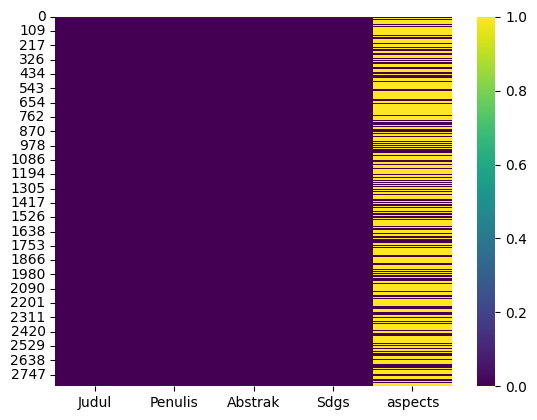

In [ ]:
# Membuat heatmap NaN
import seaborn as sns

sns.heatmap(df.isnull(), cmap='viridis')
plt.show()

In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1054 entries, 4 to 2836
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Judul    1054 non-null   object
 1   Penulis  1054 non-null   object
 2   Abstrak  1054 non-null   object
 3   Sdgs     1054 non-null   object
 4   aspects  1054 non-null   object
dtypes: object(5)
memory usage: 49.4+ KB


In [ ]:
df = df.drop(['Sdgs'],axis=1)
df
aspects = df['aspects']

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
yt = mlb.fit_transform(df['aspects'])
# Getting a sense of how the tags data looks like
print(yt)

[[0 0 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 ...
 [1 0 0 ... 0 1 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# x = 0
# df['target'] = float('nan')
# for i in range(len(df['aspects'])):
#   df['target'].iloc[i] = yt[i]
# df

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

# Inisialisasi MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Transformasi data aspek menjadi one-hot encoding
one_hot_encoded = mlb.fit_transform(df['aspects'])

for i, label in enumerate(mlb.classes_):
    df[label] = one_hot_encoded[:, i]

In [ ]:
aspectsList = df['aspects']

In [ ]:
df

,Judul,Penulis,Abstrak,aspects,SDG1,SDG10,SDG11,SDG12,SDG13,SDG14,...,SDG16,SDG17,SDG2,SDG3,SDG4,SDG5,SDG6,SDG7,SDG8,SDG9
4,Performance Analysis of Virtual Learning Syste...,"[{""Penulis"":""Arisandi, Stevan Del""},{""Penulis""...",Virtual e-learning system is a learning activi...,[SDG4],0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,An overview on information assurance framework...,"[{""Penulis"":""Utomo, Rio Guntur""},{""Penulis"":""A...",This paper offers a solution concept to develo...,"[SDG1, SDG11, SDG16, SDG17]",1,0,1,0,0,0,...,1,1,0,0,0,0,0,0,0,0
6,Toward Accurate Fused Deposition Modeling 3D P...,"[{""Penulis"":""Karna, Nyoman Bogi Aditya""},{""Pen...",This research article presents an enhanced YOL...,[SDG9],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,A TRIZ-Supported Concept and Protocol Developm...,"[{""Penulis"":""Phuah, Zhi Yuan""},{""Penulis"":""Ng,...","Currently, the use of manual labour in the tra...","[SDG1, SDG17]",1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
10,Tourism Route Recommendation Using Reinforceme...,"[{""Penulis"":""Mubarak, Muhammad Ilham""},{""Penul...",Tourism is a rapidly growing sector that has a...,"[SDG1, SDG17]",1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830,Measuring software product quality using ISO 9...,"[{""Penulis"":""Umar, Muhammad Aminu""},{""Penulis""...",ISO 9126 software quality model of 2001 is the...,"[SDG1, SDG7, SDG9, SDG12]",1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2831,Trade-off analysis for eco-tourism of the Tasi...,"[{""Penulis"":""Lola, Muhamad Safiih""},{""Penulis""...",Continuous pandemic of sustainable development...,"[SDG1, SDG8, SDG12, SDG17]",1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2832,Adaptation of indigenous community agricultura...,"[{""Penulis"":""Hapsari H.""},{""Penulis"":""Hapsari ...",Climate change is a threat to indigenous farmi...,"[SDG1, SDG2, SDG8, SDG13]",1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2833,Generating image description on Indonesian lan...,"[{""Penulis"":""Nugraha, Aditya Alif""},{""Penulis""...","Recently, research on image captioning is to g...","[SDG1, SDG17]",1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1054 entries, 4 to 2836
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Judul    1054 non-null   object
 1   Penulis  1054 non-null   object
 2   Abstrak  1054 non-null   object
 3   aspects  1054 non-null   object
 4   SDG1     1054 non-null   int64 
 5   SDG10    1054 non-null   int64 
 6   SDG11    1054 non-null   int64 
 7   SDG12    1054 non-null   int64 
 8   SDG13    1054 non-null   int64 
 9   SDG14    1054 non-null   int64 
 10  SDG15    1054 non-null   int64 
 11  SDG16    1054 non-null   int64 
 12  SDG17    1054 non-null   int64 
 13  SDG2     1054 non-null   int64 
 14  SDG3     1054 non-null   int64 
 15  SDG4     1054 non-null   int64 
 16  SDG5     1054 non-null   int64 
 17  SDG6     1054 non-null   int64 
 18  SDG7     1054 non-null   int64 
 19  SDG8     1054 non-null   int64 
 20  SDG9     1054 non-null   int64 
dtypes: int64(17), object(4)
memory usage:

In [ ]:
df['SDGs'] = df.apply(lambda x: list([x['SDG1'], x['SDG2'], x['SDG3'], x['SDG4'], x['SDG5'], x['SDG6'], x['SDG7'],
                                      x['SDG8'], x['SDG9'], x['SDG10'], x['SDG11'], x['SDG12'], x['SDG13'], x['SDG14'],
                                      x['SDG15'], x['SDG16'], x['SDG17']]),axis=1)
dfcol = df
df

,Judul,Penulis,Abstrak,aspects,SDG1,SDG10,SDG11,SDG12,SDG13,SDG14,...,SDG17,SDG2,SDG3,SDG4,SDG5,SDG6,SDG7,SDG8,SDG9,SDGs
4,Performance Analysis of Virtual Learning Syste...,"[{""Penulis"":""Arisandi, Stevan Del""},{""Penulis""...",Virtual e-learning system is a learning activi...,[SDG4],0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,An overview on information assurance framework...,"[{""Penulis"":""Utomo, Rio Guntur""},{""Penulis"":""A...",This paper offers a solution concept to develo...,"[SDG1, SDG11, SDG16, SDG17]",1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
6,Toward Accurate Fused Deposition Modeling 3D P...,"[{""Penulis"":""Karna, Nyoman Bogi Aditya""},{""Pen...",This research article presents an enhanced YOL...,[SDG9],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
7,A TRIZ-Supported Concept and Protocol Developm...,"[{""Penulis"":""Phuah, Zhi Yuan""},{""Penulis"":""Ng,...","Currently, the use of manual labour in the tra...","[SDG1, SDG17]",1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
10,Tourism Route Recommendation Using Reinforceme...,"[{""Penulis"":""Mubarak, Muhammad Ilham""},{""Penul...",Tourism is a rapidly growing sector that has a...,"[SDG1, SDG17]",1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830,Measuring software product quality using ISO 9...,"[{""Penulis"":""Umar, Muhammad Aminu""},{""Penulis""...",ISO 9126 software quality model of 2001 is the...,"[SDG1, SDG7, SDG9, SDG12]",1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,"[1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, ..."
2831,Trade-off analysis for eco-tourism of the Tasi...,"[{""Penulis"":""Lola, Muhamad Safiih""},{""Penulis""...",Continuous pandemic of sustainable development...,"[SDG1, SDG8, SDG12, SDG17]",1,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,"[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, ..."
2832,Adaptation of indigenous community agricultura...,"[{""Penulis"":""Hapsari H.""},{""Penulis"":""Hapsari ...",Climate change is a threat to indigenous farmi...,"[SDG1, SDG2, SDG8, SDG13]",1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,"[1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, ..."
2833,Generating image description on Indonesian lan...,"[{""Penulis"":""Nugraha, Aditya Alif""},{""Penulis""...","Recently, research on image captioning is to g...","[SDG1, SDG17]",1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
# df = df.drop(['SDG1','SDG2','SDG3','SDG4','SDG5','SDG6','SDG7','SDG8','SDG9','SDG10','SDG11','SDG12','SDG13','SDG14','SDG15','SDG16','SDG17','aspects'],axis =1)
# df

In [ ]:
#Membuat kamus kata baku
kata_baku = pd.read_csv('https://raw.githubusercontent.com/Zaniiiii/Data/main/aic/kamus_kbbiv2.csv.txt')
kata_baku = kata_baku.set_index("kataAlay")["kataBaik"].to_dict()

In [ ]:
#Membuat fungsi untuk melakukan cleaning pada data
def cleaning(text):
    text = str(text)

    # Mengubah setiap kata menjadi lowercase
    text =  text.lower()

    # Menghapus Link Dengan Pattern http/https
    text = re.sub(r'http\S+', '', text)

    # Menghapus hashtag dan username
    text = re.sub('(@\w+|#\w+)', '', text)

    # Menghapus Karakter Selain Huruf a-z dan A-Z
    text = re.sub('[^a-zA-Z]', ' ', text)

    # Mengganti baris baru (enter) dengan spasi
    text = re.sub("\n", " ", text)

    # Menghapus Spasi Yang Lebih Dari Satu
    text = re.sub('(s{2,})', ' ', text)

    # Mengembalikan Hasil Preprocessing Text
    return text

In [ ]:
df["AbstrakClean"] = df["Abstrak"].apply(cleaning)
df

,Judul,Penulis,Abstrak,aspects,SDG1,SDG10,SDG11,SDG12,SDG13,SDG14,...,SDG2,SDG3,SDG4,SDG5,SDG6,SDG7,SDG8,SDG9,SDGs,AbstrakClean
4,Performance Analysis of Virtual Learning Syste...,"[{""Penulis"":""Arisandi, Stevan Del""},{""Penulis""...",Virtual e-learning system is a learning activi...,[SDG4],0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",virtual e learning system is a learning activi...
5,An overview on information assurance framework...,"[{""Penulis"":""Utomo, Rio Guntur""},{""Penulis"":""A...",This paper offers a solution concept to develo...,"[SDG1, SDG11, SDG16, SDG17]",1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",this paper offers a solution concept to develo...
6,Toward Accurate Fused Deposition Modeling 3D P...,"[{""Penulis"":""Karna, Nyoman Bogi Aditya""},{""Pen...",This research article presents an enhanced YOL...,[SDG9],0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",this research article presents an enhanced yol...
7,A TRIZ-Supported Concept and Protocol Developm...,"[{""Penulis"":""Phuah, Zhi Yuan""},{""Penulis"":""Ng,...","Currently, the use of manual labour in the tra...","[SDG1, SDG17]",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",currently the use of manual labour in the tra...
10,Tourism Route Recommendation Using Reinforceme...,"[{""Penulis"":""Mubarak, Muhammad Ilham""},{""Penul...",Tourism is a rapidly growing sector that has a...,"[SDG1, SDG17]",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",tourism is a rapidly growing sector that has a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830,Measuring software product quality using ISO 9...,"[{""Penulis"":""Umar, Muhammad Aminu""},{""Penulis""...",ISO 9126 software quality model of 2001 is the...,"[SDG1, SDG7, SDG9, SDG12]",1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,"[1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, ...",iso software quality model of is the...
2831,Trade-off analysis for eco-tourism of the Tasi...,"[{""Penulis"":""Lola, Muhamad Safiih""},{""Penulis""...",Continuous pandemic of sustainable development...,"[SDG1, SDG8, SDG12, SDG17]",1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,"[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, ...",continuous pandemic of sustainable development...
2832,Adaptation of indigenous community agricultura...,"[{""Penulis"":""Hapsari H.""},{""Penulis"":""Hapsari ...",Climate change is a threat to indigenous farmi...,"[SDG1, SDG2, SDG8, SDG13]",1,0,0,0,1,0,...,1,0,0,0,0,0,1,0,"[1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, ...",climate change is a threat to indigenous farmi...
2833,Generating image description on Indonesian lan...,"[{""Penulis"":""Nugraha, Aditya Alif""},{""Penulis""...","Recently, research on image captioning is to g...","[SDG1, SDG17]",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",recently research on image captioning is to g...


In [ ]:
target = df["SDGs"]
df = df.drop(["SDGs"],axis=1)
df = df.drop(["Abstrak"],axis=1)
df["target"] = target
df

,Judul,Penulis,aspects,SDG1,SDG10,SDG11,SDG12,SDG13,SDG14,SDG15,...,SDG2,SDG3,SDG4,SDG5,SDG6,SDG7,SDG8,SDG9,AbstrakClean,target
4,Performance Analysis of Virtual Learning Syste...,"[{""Penulis"":""Arisandi, Stevan Del""},{""Penulis""...",[SDG4],0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,virtual e learning system is a learning activi...,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,An overview on information assurance framework...,"[{""Penulis"":""Utomo, Rio Guntur""},{""Penulis"":""A...","[SDG1, SDG11, SDG16, SDG17]",1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,this paper offers a solution concept to develo...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
6,Toward Accurate Fused Deposition Modeling 3D P...,"[{""Penulis"":""Karna, Nyoman Bogi Aditya""},{""Pen...",[SDG9],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,this research article presents an enhanced yol...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
7,A TRIZ-Supported Concept and Protocol Developm...,"[{""Penulis"":""Phuah, Zhi Yuan""},{""Penulis"":""Ng,...","[SDG1, SDG17]",1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,currently the use of manual labour in the tra...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
10,Tourism Route Recommendation Using Reinforceme...,"[{""Penulis"":""Mubarak, Muhammad Ilham""},{""Penul...","[SDG1, SDG17]",1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,tourism is a rapidly growing sector that has a...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830,Measuring software product quality using ISO 9...,"[{""Penulis"":""Umar, Muhammad Aminu""},{""Penulis""...","[SDG1, SDG7, SDG9, SDG12]",1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,iso software quality model of is the...,"[1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, ..."
2831,Trade-off analysis for eco-tourism of the Tasi...,"[{""Penulis"":""Lola, Muhamad Safiih""},{""Penulis""...","[SDG1, SDG8, SDG12, SDG17]",1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,continuous pandemic of sustainable development...,"[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, ..."
2832,Adaptation of indigenous community agricultura...,"[{""Penulis"":""Hapsari H.""},{""Penulis"":""Hapsari ...","[SDG1, SDG2, SDG8, SDG13]",1,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,climate change is a threat to indigenous farmi...,"[1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, ..."
2833,Generating image description on Indonesian lan...,"[{""Penulis"":""Nugraha, Aditya Alif""},{""Penulis""...","[SDG1, SDG17]",1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,recently research on image captioning is to g...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
csv_file_path = 'dataSDGS.csv'  # Specify the desired file path
df.to_csv(csv_file_path, index=False)  # Set index=False to avoid writing row indices to the CSV file

In [ ]:
df['aspects'] = aspects
df

,Judul,Penulis,aspects,SDG1,SDG10,SDG11,SDG12,SDG13,SDG14,SDG15,...,SDG2,SDG3,SDG4,SDG5,SDG6,SDG7,SDG8,SDG9,AbstrakClean,target
4,Performance Analysis of Virtual Learning Syste...,"[{""Penulis"":""Arisandi, Stevan Del""},{""Penulis""...",[SDG4],0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,virtual e learning system is a learning activi...,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,An overview on information assurance framework...,"[{""Penulis"":""Utomo, Rio Guntur""},{""Penulis"":""A...","[SDG1, SDG11, SDG16, SDG17]",1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,this paper offers a solution concept to develo...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
6,Toward Accurate Fused Deposition Modeling 3D P...,"[{""Penulis"":""Karna, Nyoman Bogi Aditya""},{""Pen...",[SDG9],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,this research article presents an enhanced yol...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
7,A TRIZ-Supported Concept and Protocol Developm...,"[{""Penulis"":""Phuah, Zhi Yuan""},{""Penulis"":""Ng,...","[SDG1, SDG17]",1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,currently the use of manual labour in the tra...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
10,Tourism Route Recommendation Using Reinforceme...,"[{""Penulis"":""Mubarak, Muhammad Ilham""},{""Penul...","[SDG1, SDG17]",1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,tourism is a rapidly growing sector that has a...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830,Measuring software product quality using ISO 9...,"[{""Penulis"":""Umar, Muhammad Aminu""},{""Penulis""...","[SDG1, SDG7, SDG9, SDG12]",1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,iso software quality model of is the...,"[1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, ..."
2831,Trade-off analysis for eco-tourism of the Tasi...,"[{""Penulis"":""Lola, Muhamad Safiih""},{""Penulis""...","[SDG1, SDG8, SDG12, SDG17]",1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,continuous pandemic of sustainable development...,"[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, ..."
2832,Adaptation of indigenous community agricultura...,"[{""Penulis"":""Hapsari H.""},{""Penulis"":""Hapsari ...","[SDG1, SDG2, SDG8, SDG13]",1,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,climate change is a threat to indigenous farmi...,"[1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, ..."
2833,Generating image description on Indonesian lan...,"[{""Penulis"":""Nugraha, Aditya Alif""},{""Penulis""...","[SDG1, SDG17]",1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,recently research on image captioning is to g...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
def combine_label(labels):
  return ','.join(labels)

def combine_label2(labels):
  return ','.join(map(str, labels))

df['aspects'] = df['aspects'].apply(combine_label)
df['target'] = df['target'].apply(combine_label2)
df

,Judul,Penulis,aspects,SDG1,SDG10,SDG11,SDG12,SDG13,SDG14,SDG15,...,SDG2,SDG3,SDG4,SDG5,SDG6,SDG7,SDG8,SDG9,AbstrakClean,target
4,Performance Analysis of Virtual Learning Syste...,"[{""Penulis"":""Arisandi, Stevan Del""},{""Penulis""...",SDG4,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,virtual e learning system is a learning activi...,"0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0"
5,An overview on information assurance framework...,"[{""Penulis"":""Utomo, Rio Guntur""},{""Penulis"":""A...","SDG1,SDG11,SDG16,SDG17",1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,this paper offers a solution concept to develo...,"1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1"
6,Toward Accurate Fused Deposition Modeling 3D P...,"[{""Penulis"":""Karna, Nyoman Bogi Aditya""},{""Pen...",SDG9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,this research article presents an enhanced yol...,"0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0"
7,A TRIZ-Supported Concept and Protocol Developm...,"[{""Penulis"":""Phuah, Zhi Yuan""},{""Penulis"":""Ng,...","SDG1,SDG17",1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,currently the use of manual labour in the tra...,"1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1"
10,Tourism Route Recommendation Using Reinforceme...,"[{""Penulis"":""Mubarak, Muhammad Ilham""},{""Penul...","SDG1,SDG17",1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,tourism is a rapidly growing sector that has a...,"1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830,Measuring software product quality using ISO 9...,"[{""Penulis"":""Umar, Muhammad Aminu""},{""Penulis""...","SDG1,SDG7,SDG9,SDG12",1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,iso software quality model of is the...,"1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0"
2831,Trade-off analysis for eco-tourism of the Tasi...,"[{""Penulis"":""Lola, Muhamad Safiih""},{""Penulis""...","SDG1,SDG8,SDG12,SDG17",1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,continuous pandemic of sustainable development...,"1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1"
2832,Adaptation of indigenous community agricultura...,"[{""Penulis"":""Hapsari H.""},{""Penulis"":""Hapsari ...","SDG1,SDG2,SDG8,SDG13",1,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,climate change is a threat to indigenous farmi...,"1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0"
2833,Generating image description on Indonesian lan...,"[{""Penulis"":""Nugraha, Aditya Alif""},{""Penulis""...","SDG1,SDG17",1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,recently research on image captioning is to g...,"1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1"


## Modelling

In [ ]:
# df["label"] = df["label"].map({"negative": 2, "neutral": 0, "positive": 1})

In [ ]:
df['aspectsList'] = aspects
df.rename(columns={"AbstrakClean": "text", "aspectsList": "label"}, inplace=True)
df = df[['text', 'label']]
df

,text,label
4,virtual e learning system is a learning activi...,[SDG4]
5,this paper offers a solution concept to develo...,"[SDG1, SDG11, SDG16, SDG17]"
6,this research article presents an enhanced yol...,[SDG9]
7,currently the use of manual labour in the tra...,"[SDG1, SDG17]"
10,tourism is a rapidly growing sector that has a...,"[SDG1, SDG17]"
...,...,...
2830,iso software quality model of is the...,"[SDG1, SDG7, SDG9, SDG12]"
2831,continuous pandemic of sustainable development...,"[SDG1, SDG8, SDG12, SDG17]"
2832,climate change is a threat to indigenous farmi...,"[SDG1, SDG2, SDG8, SDG13]"
2833,recently research on image captioning is to g...,"[SDG1, SDG17]"


In [ ]:
RANDOM_SEED = 42

df_train, df_test = train_test_split(
    df,
    test_size=0.4,
    random_state=RANDOM_SEED,
)

df_val, df_test = train_test_split(
    df_test,
    test_size=0.2,
    random_state=RANDOM_SEED,
)


In [ ]:
df_train

,text,label
1215,citarum river is one of the most important riv...,"[SDG1, SDG6, SDG11]"
1291,the use of information technology it to supp...,"[SDG1, SDG17]"
1510,some previous studies on spirulina platensis s...,"[SDG1, SDG9, SDG17]"
2594,hotspots are indicators of forest fires that d...,"[SDG1, SDG11]"
245,purpose ex prisoners often experience negativ...,"[SDG1, SDG4, SDG10, SDG17]"
...,...,...
832,post pandemic and globalization have accelerat...,[SDG9]
1162,the tourism sector utilizes information and co...,"[SDG1, SDG17]"
336,online transactions play an increasingly impor...,"[SDG1, SDG17]"
2821,digital technology has driven changes in marke...,[SDG9]


In [ ]:
actual_label = df_test['label']

In [ ]:
df_train.to_csv("train.csv", index=False)
df_val.to_csv("eval.csv", index=False)
df_test.to_csv("test.csv", index=False)

In [ ]:
from datasets import load_dataset

files = {
    "train": "train.csv",
    "eval": "eval.csv",
    "test": "test.csv",
}

dataset = load_dataset('csv', data_files=files)


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating eval split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

### **Tokenize Model**

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("afbudiman/indobert-distilled-optimized-for-classification")

In [ ]:
def tokenize_function(text):
    return tokenizer(text["text"], padding='max_length', max_length=256)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/632 [00:00<?, ? examples/s]

Map:   0%|          | 0/337 [00:00<?, ? examples/s]

Map:   0%|          | 0/85 [00:00<?, ? examples/s]

In [ ]:
train_dataset = tokenized_datasets["train"]
eval_dataset = tokenized_datasets["eval"]

### **Train Model**

In [ ]:
import torch

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [ ]:
print(DEVICE)

cuda:0


In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("afbudiman/indobert-distilled-optimized-for-classification", num_labels=3)

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    "test_trainer",
    per_device_train_batch_size=4,
)

In [ ]:
# import os
# os.kill(os.getpid(), 9)

In [ ]:
metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    return metric.compute(predictions=predictions, references=labels)

torch.cuda.empty_cache()

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
)

training_history = trainer.train()

ValueError: ignored

### **Evaluate Model**

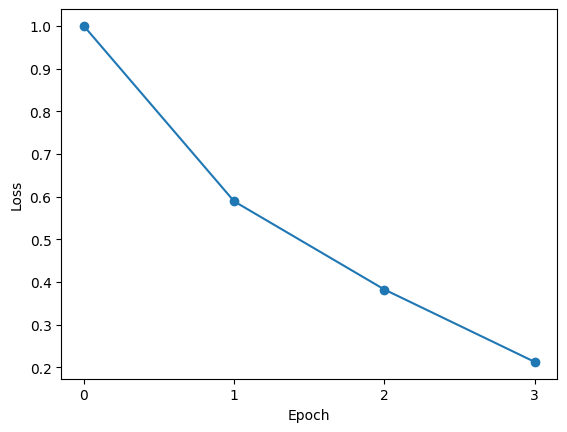

In [ ]:
plt.plot([1, 0.5891, 0.3825, 0.2129], marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks([0, 1, 2, 3])
plt.show()


In [ ]:
evaluation_history = trainer.evaluate()
evaluation_history

{'eval_loss': 1.153111457824707,
 'eval_accuracy': 0.7057291666666666,
 'eval_runtime': 3.052,
 'eval_samples_per_second': 125.818,
 'eval_steps_per_second': 15.727,
 'epoch': 3.0}

In [ ]:
test_dataset = tokenized_datasets["test"]

prediction = trainer.predict(test_dataset)
prediction = prediction.predictions.argmax(1)

In [ ]:
print(classification_report(prediction, actual_label, target_names=["Netral", "Positif", "Negatif"]))

              precision    recall  f1-score   support

      Netral       0.83      0.74      0.78        70
     Positif       0.42      0.50      0.46        16
     Negatif       0.36      0.50      0.42        10

    accuracy                           0.68        96
   macro avg       0.53      0.58      0.55        96
weighted avg       0.71      0.68      0.69        96



In [ ]:
print(classification_report(prediction, actual_label, target_names=["Netral", "Positif", "Negatif"]))

              precision    recall  f1-score   support

      Netral       0.83      0.74      0.78        70
     Positif       0.42      0.50      0.46        16
     Negatif       0.36      0.50      0.42        10

    accuracy                           0.68        96
   macro avg       0.53      0.58      0.55        96
weighted avg       0.71      0.68      0.69        96



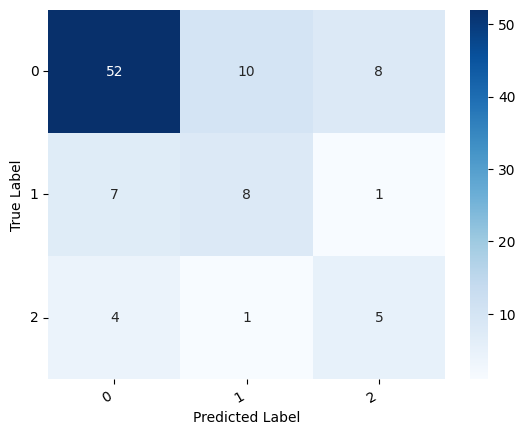

In [ ]:
def show_confusion_matrix(confusion_matrix):
        hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
        hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
        hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')

        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')

cm = confusion_matrix(prediction, actual_label)
show_confusion_matrix(cm)

### **Save And Load Model**

In [ ]:
model.save_pretrained("model")

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("model")

In [ ]:
trainer = Trainer(model=model)

In [ ]:
def predict(text):
    tokenized = tokenizer(text, padding='max_length', max_length=256)
    label = trainer.predict([tokenized]).predictions.argmax(1)[0]
    if label == 0:
        print(f'Predicted: Negatif [{label}]')
    elif label == 1:
        print(f'Predicted: Netral [{label}]')
    else:
        print(f'Predicted: Positif [{label}]')


In [ ]:
predict("""
    universitas telkom mahal banget bayar bpp full
    padahal kuliah online gak dikembalikan duitnya
""")

TypeError: ignored

In [ ]:
predict("saya senang sekali kuliah di universitas telkom")

In [ ]:
predict("kuliah online di tel-u enak-enak aja kok")

In [ ]:
print(classification_report(prediction, actual_label, target_names=["Netral", "Positif", "Negatif"]))

              precision    recall  f1-score   support

      Netral       0.83      0.74      0.78        70
     Positif       0.42      0.50      0.46        16
     Negatif       0.36      0.50      0.42        10

    accuracy                           0.68        96
   macro avg       0.53      0.58      0.55        96
weighted avg       0.71      0.68      0.69        96



In [ ]:
print(classification_report(prediction, actual_label, target_names=["Netral", "Positif", "Negatif"]))

              precision    recall  f1-score   support

      Netral       0.83      0.74      0.78        70
     Positif       0.42      0.50      0.46        16
     Negatif       0.36      0.50      0.42        10

    accuracy                           0.68        96
   macro avg       0.53      0.58      0.55        96
weighted avg       0.71      0.68      0.69        96

